<a href="https://colab.research.google.com/github/richieyuyongpoh/Practical-R-series/blob/main/Turning_Data_into_Actionable_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Turning Data into Actionable Insights**

Prepared by:
    
Dr. Yong Poh Yu
<br><br>

LinkedIn: [Yong Poh Yu](https://www.linkedin.com/in/yong-poh-yu/)

Github: [Practical R Series](https://github.com/richieyuyongpoh/Practical-R-series/blob/main/Turning_Data_into_Actionable_Insights.ipynb) 



# **Notice**
The practical handout is open-source and under 
[GNU General Public License v3.0](https://www.gnu.org/licenses/gpl-3.0.en.html).

Please cite my repository/work if you are using any contents written in this practical handout. 

## **Use Case 1: Customer Segmentation**

[Reference](https://anthonysmoak.com/2018/12/24/connecting-tableau-with-r/)  

### Motivation

Customer Segmentation is the subdivision of a market into discrete customer groups that share similar characteristics. Customer Segmentation can be a powerful means to identify unsatisfied customer needs. 

The most common ways in which businesses segment their customer base are:
 

*   Customer Background, eg: geographical information
*   Behavioral Data, eg: spending habit



### Advantages of Customer Segmentation

*   Determine appropriate product pricing.
*   Develop customized marketing campaigns.
*   Design an optimal distribution strategy.
*   Choose specific product features for deployment.
*   Prioritize new product development efforts.


### Introduction to *k*-means

*   Specify number of clusters K.
*   Initialize centroids by first shuffling the dataset and then randomly selecting K data points for the centroids without replacement.
*   Keep iterating until there is no change to the centroids. i.e assignment of data points to clusters isn’t changing.

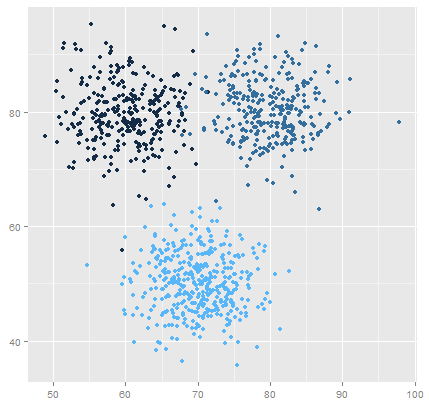



(photo credit: [HERE](https://towardsdatascience.com/customer-segmentation-using-k-means-clustering-d33964f238c3) )

### *k*-means (in English)

To simply the analytical processes, i want to design a solution that helps to automatically group my customers into few groups. Every group has its own uniqueness. There is/are significant differences between any two groups. 

For instance, **Group 2 members (auto grouped by machine@computer) tend to buy Grocery, Milk and Detergent Paper together, with higher amount of expenses** . 

*k*-means can easily group @segmentize the customers such a way. 

### Real-time Demo

Go to the [page](https://www.richieyyptutorialpage.com/demo-r-series/customer-segmention-using-k-means)



### Practical Codes (in R)

Note: For the following codes, we shall just roughly *touch and go* first. The details of each function@syntax will be discussed in the subsequent subsections. 

1: Read the [`Wholesale customers data.csv`](https://raw.githubusercontent.com/richieyuyongpoh/Practical-R-series/main/Wholesale%20customers%20data.csv) . 

This data set refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

For more information, please refer to this [page](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [44]:
myData <- read.csv("https://raw.githubusercontent.com/richieyuyongpoh/Practical-R-series/main/Wholesale%20customers%20data.csv")
head(myData)

,CustomerId,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,2,3,12669,9656,7561,214,2674,1338
2,2,2,3,7057,9810,9568,1762,3293,1776
3,3,2,3,6353,8808,7684,2405,3516,7844
4,4,1,3,13265,1196,4221,6404,507,1788
5,5,2,3,22615,5410,7198,3915,1777,5185
6,6,2,3,9413,8259,5126,666,1795,1451


2: Observe the summary of the dataset

In [2]:
summary(myData)

   CustomerId       Channel          Region          Fresh       
 Min.   :  1.0   Min.   :1.000   Min.   :1.000   Min.   :     3  
 1st Qu.:110.8   1st Qu.:1.000   1st Qu.:2.000   1st Qu.:  3128  
 Median :220.5   Median :1.000   Median :3.000   Median :  8504  
 Mean   :220.5   Mean   :1.323   Mean   :2.543   Mean   : 12000  
 3rd Qu.:330.2   3rd Qu.:2.000   3rd Qu.:3.000   3rd Qu.: 16934  
 Max.   :440.0   Max.   :2.000   Max.   :3.000   Max.   :112151  
      Milk          Grocery          Frozen        Detergents_Paper 
 Min.   :   55   Min.   :    3   Min.   :   25.0   Min.   :    3.0  
 1st Qu.: 1533   1st Qu.: 2153   1st Qu.:  742.2   1st Qu.:  256.8  
 Median : 3627   Median : 4756   Median : 1526.0   Median :  816.5  
 Mean   : 5796   Mean   : 7951   Mean   : 3071.9   Mean   : 2881.5  
 3rd Qu.: 7190   3rd Qu.:10656   3rd Qu.: 3554.2   3rd Qu.: 3922.0  
 Max.   :73498   Max.   :92780   Max.   :60869.0   Max.   :40827.0  
   Delicassen     
 Min.   :    3.0  
 1st Qu.:  408.2 

3: Is there any outlier? 

demo: go to this [page](https://www.richieyyptutorialpage.com/demo-r-series/exploratory-data-analysis)

In [ ]:
install.packages("tidyr")

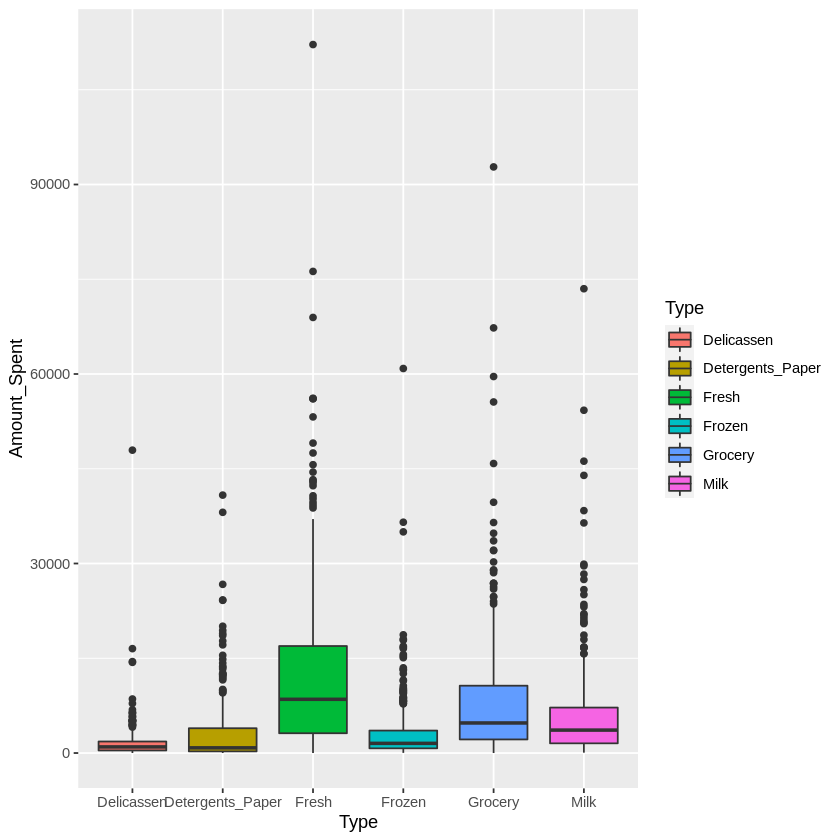

In [48]:
library(ggplot2)
library(tidyr)
library(dplyr)
myData %>% select(Fresh, Milk, Grocery,Frozen,Detergents_Paper, Delicassen) %>%
  pivot_longer( cols = c(Fresh, Milk, Grocery,Frozen,Detergents_Paper, Delicassen), 
                names_to = "Type", 
                values_to = "Amount_Spent") %>%
  ggplot(aes(x = Type, y = Amount_Spent, fill = Type)) +
    geom_boxplot() 

4: How about *k*-means? 

In [49]:
selectedData <- select (myData,Fresh, Milk, Grocery,Frozen,Detergents_Paper, Delicassen)
km_res <- kmeans (selectedData,centers = 5,nstart = 20)
results_5clusters <- factor(km_res$cluster)
head(results_5clusters)

[1] 3 3 3 3 5 3
Levels: 1 2 3 4 5

In [50]:
myDataClustered <- cbind(myData,results_5clusters)
head(myDataClustered)

,CustomerId,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,results_5clusters
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
1,1,2,3,12669,9656,7561,214,2674,1338,3
2,2,2,3,7057,9810,9568,1762,3293,1776,3
3,3,2,3,6353,8808,7684,2405,3516,7844,3
4,4,1,3,13265,1196,4221,6404,507,1788,3
5,5,2,3,22615,5410,7198,3915,1777,5185,5
6,6,2,3,9413,8259,5126,666,1795,1451,3


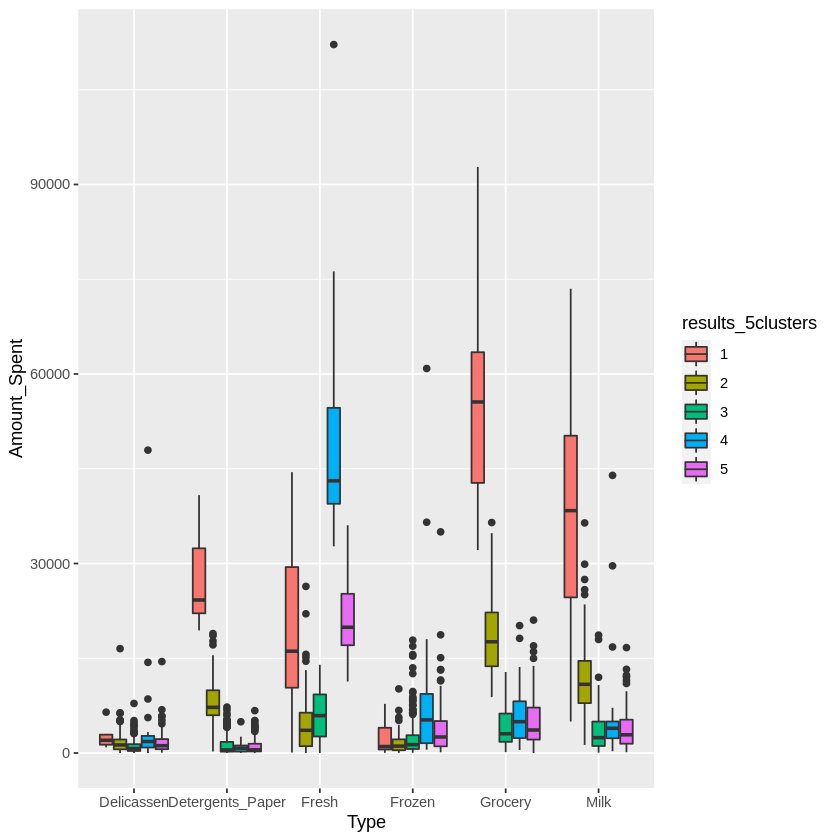

In [51]:
myDataClustered %>% select(Fresh, Milk, Grocery,Frozen,Detergents_Paper, Delicassen,results_5clusters) %>%
  pivot_longer( cols = c(Fresh, Milk, Grocery,Frozen,Detergents_Paper, Delicassen), 
                names_to = "Type", 
                values_to = "Amount_Spent") %>%
  ggplot(aes(x = Type, y = Amount_Spent, fill = results_5clusters)) +
    geom_boxplot() 

5: Which *k* is the best?

In [52]:
selectedData <- select (myData,Fresh, Milk, Grocery,Frozen,Detergents_Paper, Delicassen)
km_res <- kmeans (selectedData,centers = 3,nstart = 20)
results_3clusters <- factor(km_res$cluster)
head(results_3clusters)

[1] 2 2 2 2 3 2
Levels: 1 2 3

In [53]:
myDataClustered <- cbind(myData,results_3clusters)
head(myDataClustered)

,CustomerId,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,results_3clusters
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
1,1,2,3,12669,9656,7561,214,2674,1338,2
2,2,2,3,7057,9810,9568,1762,3293,1776,2
3,3,2,3,6353,8808,7684,2405,3516,7844,2
4,4,1,3,13265,1196,4221,6404,507,1788,2
5,5,2,3,22615,5410,7198,3915,1777,5185,3
6,6,2,3,9413,8259,5126,666,1795,1451,2


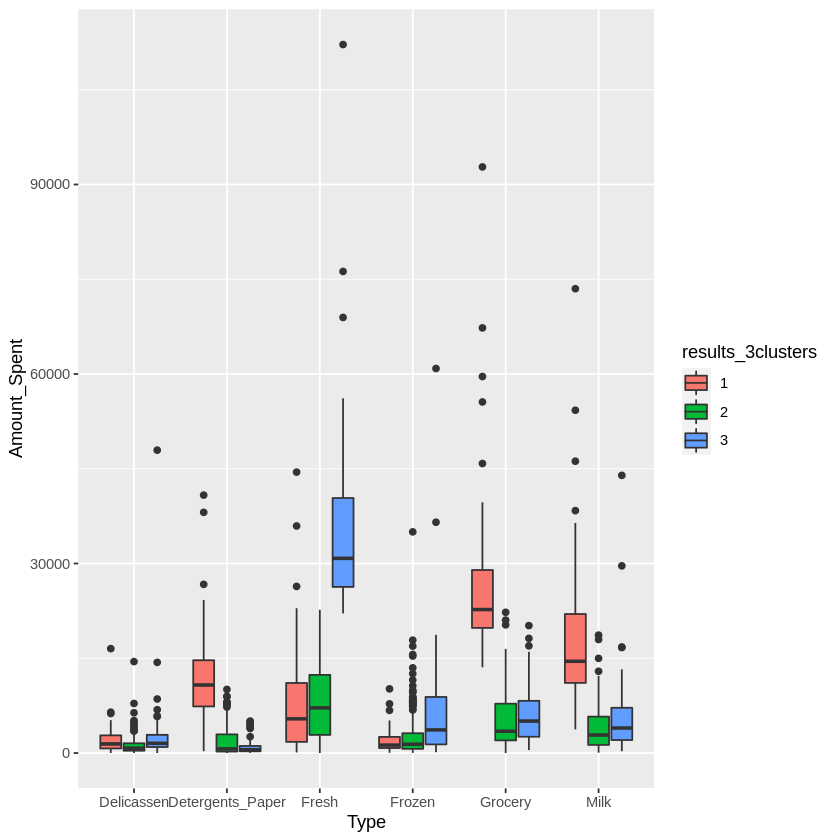

In [54]:
myDataClustered %>% select(CustomerId, Fresh, Milk, Grocery,Frozen,Detergents_Paper, Delicassen,results_3clusters) %>%
  pivot_longer( cols = c(Fresh, Milk, Grocery,Frozen,Detergents_Paper, Delicassen), 
                names_to = "Type", 
                values_to = "Amount_Spent") %>%
  ggplot(aes(x = Type, y = Amount_Spent, fill = results_3clusters)) +
    geom_boxplot() 

### Exercise

By using similar approach, segmentize the [`Family Income and Expenditure.csv`](https://raw.githubusercontent.com/richieyuyongpoh/Practical-R-series/main/Family%20Income%20and%20Expenditure.csv) into different groups, based on the spending habits on the following six items:


1.   Total Rice Expenditure
2.   Meat Expenditure
3.   Fruit Expenditure
4.   Bread and Cereals Expenditure
5.   Total Fish and Marine Products Expenditure
6.   Vegetables Expenditure

Note: This dataset was downloaded from [Kaggle](https://www.kaggle.com/grosvenpaul/family-income-and-expenditure)

You may also refer to this [page](https://www.richieyyptutorialpage.com/demo-r-series/household-income-and-food-expenditure) to view the dashboard.



1: Read the dataset 

In [55]:
newData <- read.csv("https://raw.githubusercontent.com/richieyuyongpoh/Practical-R-series/main/Family%20Income%20and%20Expenditure.csv")
head(newData)

,Total.Household.Income,Region,Total.Food.Expenditure,Main.Source.of.Income,Agricultural.Household.indicator,Bread.and.Cereals.Expenditure,Total.Rice.Expenditure,Meat.Expenditure,Total.Fish.and..marine.products.Expenditure,Fruit.Expenditure,⋯,Number.of.Refrigerator.Freezer,Number.of.Washing.Machine,Number.of.Airconditioner,Number.of.Car..Jeep..Van,Number.of.Landline.wireless.telephones,Number.of.Cellular.phone,Number.of.Personal.Computer,Number.of.Stove.with.Oven.Gas.Range,Number.of.Motorized.Banca,Number.of.Motorcycle.Tricycle
,<int>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,⋯,1,1,0,0,0,2,1,0,0,1
2,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,⋯,0,1,0,0,0,3,1,0,0,2
3,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,⋯,0,0,0,0,0,0,0,0,0,0
4,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,⋯,0,0,0,0,0,1,0,0,0,0
5,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,⋯,1,0,0,0,0,3,0,0,0,1
6,152883,CAR,73326,Wage/Salaries,0,29065,25190,15336,8572,2614,⋯,0,1,0,0,0,4,0,0,0,1


2: Explore the dataset

In [56]:
summary(newData)

 Total.Household.Income    Region          Total.Food.Expenditure
 Min.   :   11285       Length:41544       Min.   :  2947        
 1st Qu.:  104895       Class :character   1st Qu.: 51017        
 Median :  164080       Mode  :character   Median : 72986        
 Mean   :  247556                          Mean   : 85099        
 3rd Qu.:  291138                          3rd Qu.:105636        
 Max.   :11815988                          Max.   :827565        
 Main.Source.of.Income Agricultural.Household.indicator
 Length:41544          Min.   :0.0000                  
 Class :character      1st Qu.:0.0000                  
 Mode  :character      Median :0.0000                  
                       Mean   :0.4299                  
                       3rd Qu.:1.0000                  
                       Max.   :2.0000                  
 Bread.and.Cereals.Expenditure Total.Rice.Expenditure Meat.Expenditure
 Min.   :     0                Min.   :     0         Min.   :     0  
 1st

3: Continue the steps

In [57]:
# Write your codes here

newData %>% select(Bread.and.Cereals.Expenditure,
                   Total.Rice.Expenditure,
                    Meat.Expenditure,
                    Total.Fish.and..marine.products.Expenditure,
                    Fruit.Expenditure,
                    Vegetables.Expenditure
                    )

# Edit the template codes and continue with your codes

Bread.and.Cereals.Expenditure,Total.Rice.Expenditure,Meat.Expenditure,Total.Fish.and..marine.products.Expenditure,Fruit.Expenditure,Vegetables.Expenditure
<int>,<int>,<int>,<int>,<int>,<int>
42140,38300,24676,16806,3325,13460
17329,13008,17434,11073,2035,7833
34182,32001,7783,2590,1730,3795
34030,28659,10914,10812,690,7887
34820,30167,18391,11309,1395,11260
29065,25190,15336,8572,2614,9035
40992,36312,12968,12310,2565,15620
37168,28156,14640,15896,3365,10520
23117,15845,11464,6685,1370,5235


4: What are your findings/insights? 